<a href="https://colab.research.google.com/github/sanyam83/learnopencv/blob/master/ALPR/License_plate_detection_YOLOv4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Thu Mar 24 05:29:11 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Optional
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Darknet

### Initialising darknet

In [ ]:
!git clone https://github.com/AlexeyAB/darknet

In [ ]:
%cd ./darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile

In [ ]:
# make darknet (builds darknet so that the darknet executable file can be used to run or train object detectors)
!make

In [ ]:
import os
import cv2
import numpy as np
import darknet
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as img

## Dataset

Google open images is used - 
[Link](https://drive.google.com/drive/folders/1DghyfRyo3Rdl0lxBwkevsBjKIjJ_5NrX?usp=sharing)

The obj folder given in the link above should be placed under the folder ./darknet/data

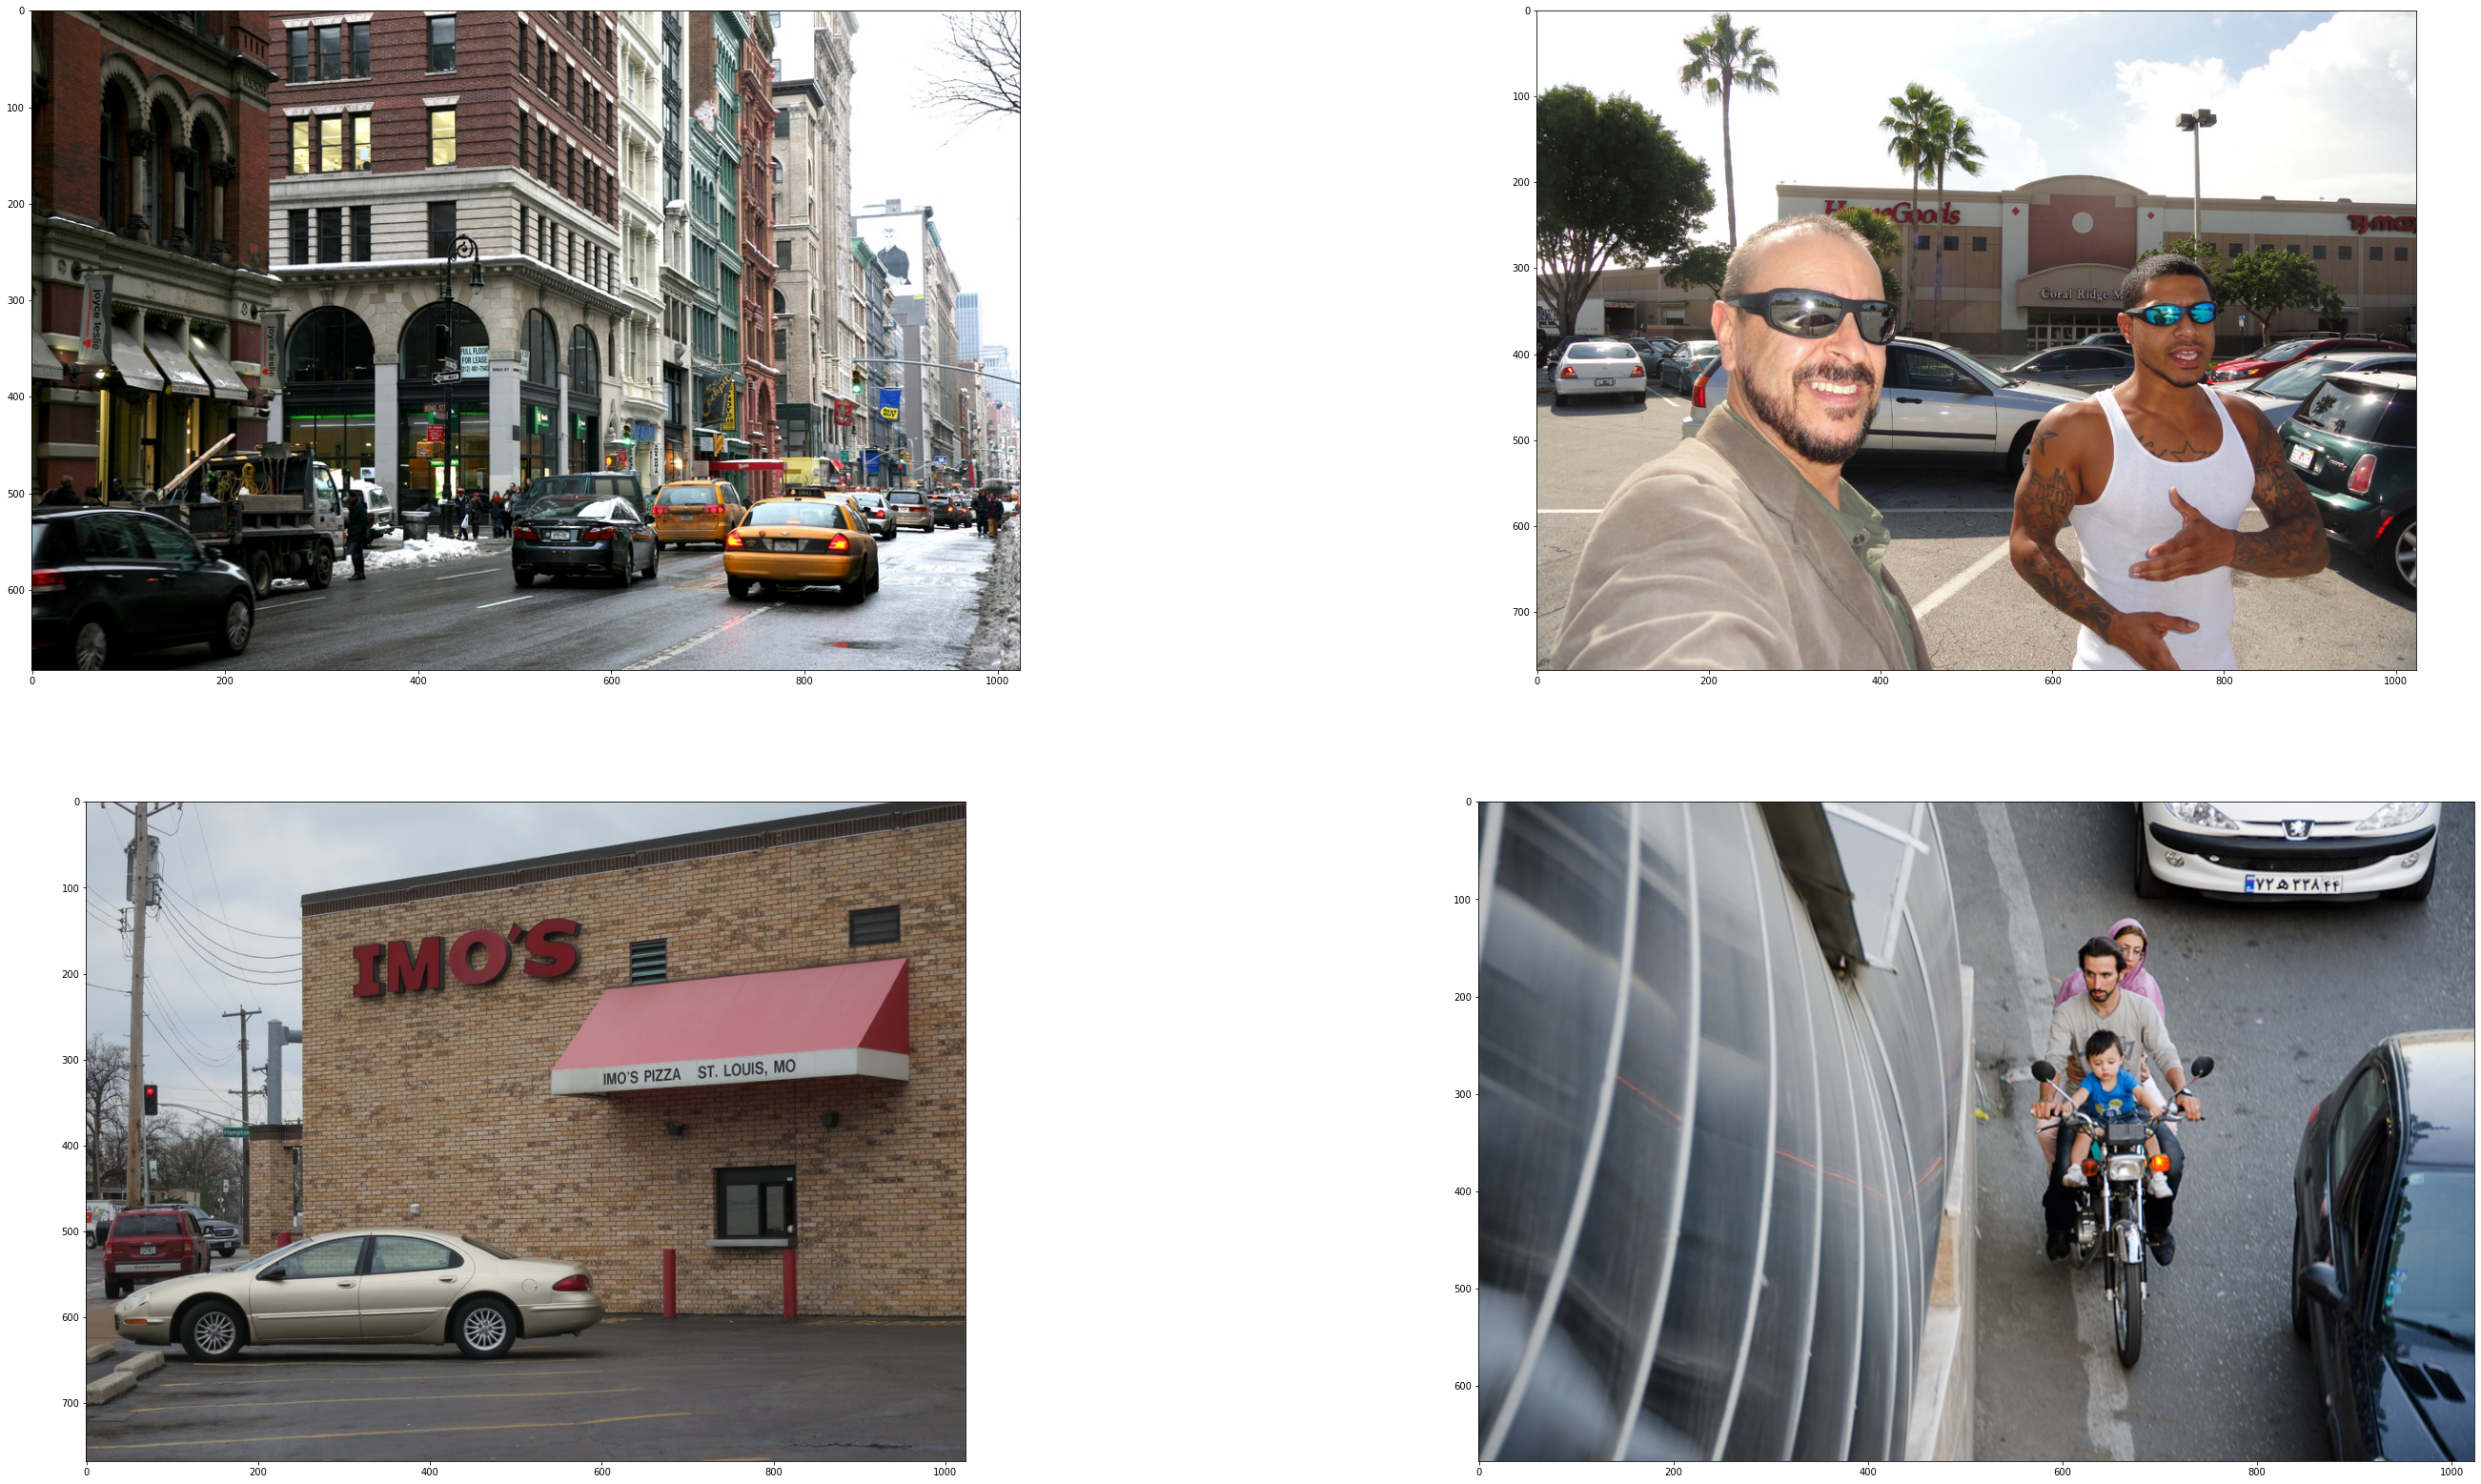

In [ ]:
import math
# Creating a list of image files of the dataset.
data_path = './data/obj/train/'
files = os.listdir(data_path)
img_arr = []

# Displaying 4 images only.
num = 4

# Appending the array of images to a list.
for fimg in files:
    if fimg.endswith('.jpg'):
      demo = img.imread(data_path+fimg)
      img_arr.append(demo)
      if len(img_arr) == num:
        break

# Plotting the images using matplotlib.
_, axs = plt.subplots(math.floor(num/2), math.ceil(num/2), figsize=(50, 28))

axs = axs.flatten()

for cent, ax in zip(img_arr, axs):
    ax.imshow(cent)
plt.show()

### Getting YOLOv4 pre-trained weights

In [ ]:
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137

### Utility functions

In [ ]:
# Function for displaying images.
def disp(input):
  image = img.imread(input)
  plt.figure(figsize = (25,14))
  plt.imshow(image)
  plt.show()

# Training

When training, the model will save the best checkpoint or weights. For that we need to create a folder named 

In [ ]:
# Creating a folder checkpoint to save weights while training.
%cd ../
!mkdir checkpoint

For the training process, two files need to be created, one of which contains the information of train data, test data, and information about classes. Let’s call it obj.data (can be downloaded from [here](https://drive.google.com/file/d/1QYm717Oiwd2xYqkFc6qIqUh6QsTauEG9/view?usp=sharing)) and the other is obj.names which contains the names of all the classes. You can download obj.names from [here](https://drive.google.com/file/d/1W3exuzoTCZF1h5vgKFpOx0b48KfjR3CB/view?usp=sharing). Both the files should be put under ./darknet/data folder.


Before starting the training process, the config file(.cfg) also needs to be modified. Download it directly from [here](https://drive.google.com/file/d/10Ovts5nLrU_hJ-A-BbwvCniv-xF6RZjg/view?usp=sharing) and should be put under ./darknet/cfg folder.


In [ ]:
# Training YOLOv4.
%cd ./darknet
!./darknet detector train data/obj.data cfg/yolov4-obj.cfg yolov4.conv.137 -dont_show -map


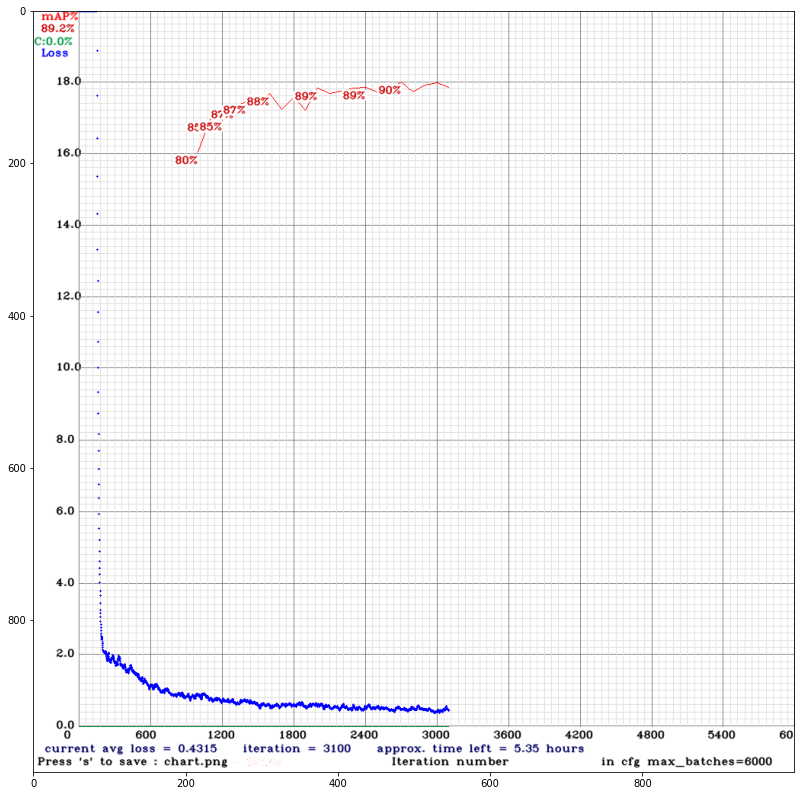

In [ ]:
disp('./chart_yolov4-obj.png')

## Yolo-tiny

In [ ]:
# Downloading YOLOv4-tiny pre-trained weights.
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v4_pre/yolov4-tiny.conv.29

Download YOLOv4-tiny config file from [here](https://drive.google.com/file/d/1QdM86TYburNFuTX0hEsTAVBI4XV542W-/view?usp=sharing).

In [ ]:
!./darknet detector train data/obj.data cfg/yolov4-tiny-obj.cfg yolov4-tiny.conv.29 -dont_show -map


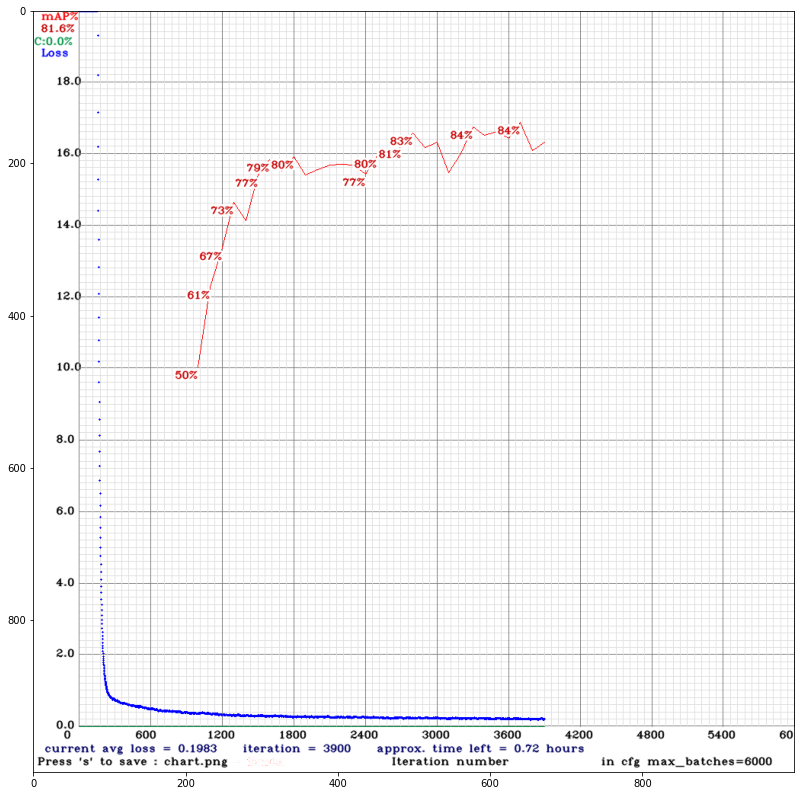

In [ ]:
disp('./chart_yolov4-tiny-obj.png')

## Inference

Get the trained weights of YOLOv4 [here](https://drive.google.com/file/d/1s2O6oifPQsmdbyiSbzTcHq8zW44dcmZV/view?usp=sharing) (use if skipped the training)

### YOLOv4

**Test image 1**

In [ ]:
!python darknet_images.py --thresh 0.2 --input ../b076ad266891d7aa.jpg --output ../demo_out  --weights ../checkpoint/yolov4-obj_best.weights --config_file ./cfg/yolov4-obj.cfg --data_file ./data/obj.data 


In [ ]:
disp('../demo-out/out_b076ad266891d7aa.jpg')

**Test image 2**

In [ ]:
!python darknet_images.py --thresh 0.2 --input ../b1096bc91a89b0cf.jpg --output ../demo-out --weights ../checkpoint/yolov4-obj_best.weights --config_file ./cfg/yolov4-obj.cfg --data_file ./data/obj.data 


In [ ]:
disp('../demo-out/out_b1096bc91a89b0cf.jpg')

### YOLOv4-Tiny

Download YOLOv4-Tiny weights from [here](https://drive.google.com/file/d/1-6bWHKVx8P62WUGFWsjPhUdFW0Yh8ZtM/view?usp=sharing).

**Test image 1**

In [ ]:
!python darknet_images.py --thresh 0.2 --input ../b076ad266891d7aa.jpg --output ../demo-out-tiny  --weights ../checkpoint/yolov4-tiny-obj_best.weights --config_file ./cfg/yolov4-tiny-obj.cfg --data_file ./data/obj.data 

In [ ]:
disp('../demo-out-tiny/out_b076ad266891d7aa.jpg')

**Test image 2**

In [ ]:
!python darknet_images.py --thresh 0.2 --input ../b8a3f2ea385e45b3.jpg --output ../demo-out-tiny  --weights ../checkpoint/yolov4-tiny-obj_best.weights --config_file ./cfg/yolov4-tiny-obj.cfg --data_file ./data/obj.data 

In [ ]:
disp('../demo-out-tiny/out_b8a3f2ea385e45b3.jpg')

# Conclusion

YOLOv4 performs better than YOLOv4-tiny on google open images dataset with more than 90% mAP and speed of around 25 FPS.

YOLOv4 tiny gives mAP of 84% with speed of more than 40 FPS

## Resources

YOLOv4 code and weights- https://github.com/AlexeyAB/darknet

Dataset and images - https://storage.googleapis.com/openimages/web/index.html



